<a href="https://colab.research.google.com/github/Zactyz/AI-Repo/blob/master/HW_5/Homework_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 5 - Zachary Zimmerman

#General Concepts

##Artificial Intelligence

Artificial intelligence, or AI, is something that we often hear about in movies refering to evil super computers or other unrealistic scenarios. But what is it really? 

Artificial intelligence is the science in which a machine can be built that is "intelligent." This means the device can analyze its environment, adapt to problems it is presented with, and create the best odds for suxccessfully achieving its goals. These intelligent machines are as close as possible to copying the learning function of the human brain.

##Machine Learning

Machine learning falls closely related to Artificial intelligence, and in fact is part of that science. Machine learning is what allows computers to "learn" from their surroundings, from the information provided to them, without being programmed for each and every part. This learning is what allows the computer to be intelligent. 

Interestingly, there are different factions of this machine learning. There is supervised, in which the system is trained to recognize certain functions and make predictions. Unsupervised and semi-supervised have less explicit intructions and allow the computer a bit more freesom with unlabeled input data. Finally, Reinforcement learning is much more like a trial and error type learning environment for the computer, with reward feedback. 

##Deep Learning

Deep learning is, like machine learning, another subset of AI. Deep learning, in contrast to machine learning, works on and analyzes a **full** artificial neural network from higher level, raw input. Deep learning of learning, also, can be supervised, semi-supervised or unsupervised. This type of AI is the most similar to the processes performed by the human brain.

#Basic Concepts

##Linear Regression

Linear Regression, though daunting for me at first glance, is actually a very simple but useful Statistical Data Analysis technique. Linear regression is used to model the linear relationship between a dependent variable and one or more independent variables. It is useful for predicting and explaining variation in observed data collection.

In its simplest form, linear regression is represented by the equation: $y = mx + b$

If multidimentional, the equation becomes: $ \hat y = b + w_1 x_1 + w_2 x_2 + ... + w_n x_n $

##Creating a Linear Regression Model (Keras)

In [56]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

m = 100
x = 2 * np.random.rand(m, 1)
y = 6 + 8 * x + np.random.rand(m, 1)

x_training, x_testing, y_training, y_testing = train_test_split(x, y, test_size=0.2, shuffle=True)

model = keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=1, activation='sigmoid'))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.5)
    
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=optimizer)

history = model.fit(x_training, y_training, epochs=5)

Epoch 1/5
3/3 [==============================] - 0s 3ms/step - loss: -7.3665
Epoch 2/5
3/3 [==============================] - 0s 2ms/step - loss: -52.8979
Epoch 3/5
3/3 [==============================] - 0s 1ms/step - loss: -101.4453
Epoch 4/5
3/3 [==============================] - 0s 2ms/step - loss: -147.7621
Epoch 5/5
3/3 [==============================] - 0s 1ms/step - loss: -194.5627


###Extracting Data, Plotting, and Drawing Prediction Line

Using the Linear Regression model, the data can be plotted for visualization, from which the prediction line can be formulated. This line is of the form:  $\hat y = wx + b$

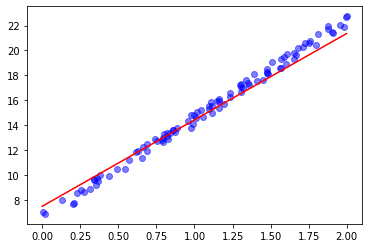

In [57]:
weights = model.get_weights()

fig, ax = plt.subplots()
ax.plot(np.linspace(0, max(x)), np.linspace(0, max(x)) * weights[0] + weights[1], color='red')
ax.scatter(x,y, color='blue', alpha=0.5)

plt.show()

##Logistic Regression

Logistic Regression is another statistical model which uses a logistic function to model a binary dependent variable. This type of regression is useful for estimating the paramerters of a logistic model, calculating the probability of certain event outcomes. This can be used, for example, to determine if an image contains a certain object, etc. 

The model bases outcomes on the equation:  $ \hat y = \sigma (b + w_1 x_1 + w_2 x_2 + ... + w_n x_n )$

The following is an example using this model.

##Creating a Logistic Regression Model

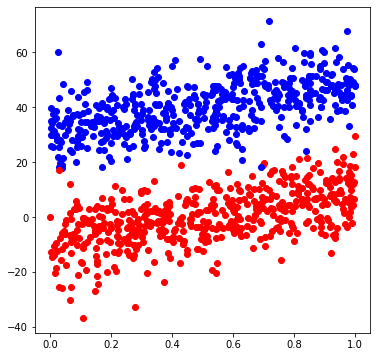

In [52]:
import array as ar

def get_random_data(w, b, mu, sigma, m):

  data = np.empty([m, 2])
  labels = np.empty([m, 1])

  for i in range(0, m-1):
    n = np.random.default_rng().normal(mu, sigma)
    c = np.random.randint(0, 2)
    x_1 = np.random.default_rng().uniform(0, 1)
    x_2 = w * x_1 + b + (-1) ** c * n
    data[i, 0] = x_1
    data[i, 1] = x_2
    labels[i] = c

  return labels, data;

def display_random_data(labels, data):
  for i in range(0, len(data)):
    if ((labels[i] == 0)):
      plt.plot(data[i, 0], data[i, 1], 'bo')
    else:
      plt.plot(data[i, 0], data[i, 1], 'ro')

w = 20
b = 10
mu = 20
sigma = 8
m = 1000
plt.subplots(figsize=(6,6))
labels, data = get_random_data(w, b, mu, sigma, m)
display_random_data(labels, data);

##Training a Model (Keras)

When training a model, the data that was collected is essentially mapping the model features to the labels, so that it can be evaluated to make predictions about future related data.

A model needs to be flexible while still accounting for the right amount of data. 

**Underfitting** is caused by the model not accounting for enough of the data and creating a prediction line which has little to no consideration of the data. This will lead to a high training and high testing error. 

**Overfitting** on the other hand memorizes all parts of the data, accounting for too much, and cannot then form an idea of a relationship within the data. This will lead to an extremely low training error but a high testing error.

Finding the in-between balance is important in training a model. below is an example of this process.

In [0]:
#split into training and testing

def split_data(labels, data):
  training = int(0.8 * len(data))
  test = int(0.2 * len(data))

  data_training = np.empty([training, 2])
  data_test = np.empty([test, 2])
  labels_training = np.empty([training, 1])
  labels_test = np.empty([test, 1])

  for i in range(0, len(data)):
    if (i<training):
      data_training[i] = data[i]
      labels_training[i] = labels[i]
    else:
      data_test[len(data) - i - 1] = data[i]
      labels_test[len(data) - i - 1] = labels[i]


  return data_training, data_test, labels_training, labels_test

data_training, data_test, labels_training, labels_test = split_data(labels, data)

##Comping the Model (Keras)

In [0]:
#implement Keras

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
%tensorflow_version 2.x

features = 2
output = 1
learning_rate=.01

model = keras.Sequential()
model.add(tf.keras.layers.Dense(output, input_dim=features, activation='sigmoid'))
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=optimizer)

history = model.fit(data_training, labels_training, epochs=40)

weights = model.get_weights()

print("")
print("weight shape: ", weights[0].shape)
print("bias term shape: ", weights[1].shape)

Epoch 1/40
25/25 [==============================] - 0s 1ms/step - loss: 1.0111
Epoch 2/40
25/25 [==============================] - 0s 994us/step - loss: 0.5254
Epoch 3/40
25/25 [==============================] - 0s 1ms/step - loss: 0.2423
Epoch 4/40
25/25 [==============================] - 0s 1ms/step - loss: 0.2018
Epoch 5/40
25/25 [==============================] - 0s 1ms/step - loss: 0.1751
Epoch 6/40
25/25 [==============================] - 0s 1ms/step - loss: 0.1555
Epoch 7/40
25/25 [==============================] - 0s 1ms/step - loss: 0.1395
Epoch 8/40
25/25 [==============================] - 0s 1ms/step - loss: 0.1263
Epoch 9/40
25/25 [==============================] - 0s 926us/step - loss: 0.1154
Epoch 10/40
25/25 [==============================] - 0s 980us/step - loss: 0.1065
Epoch 11/40
25/25 [==============================] - 0s 1ms/step - loss: 0.0984
Epoch 12/40
25/25 [==============================] - 0s 995us/step - loss: 0.0919
Epoch 13/40
25/25 [======================

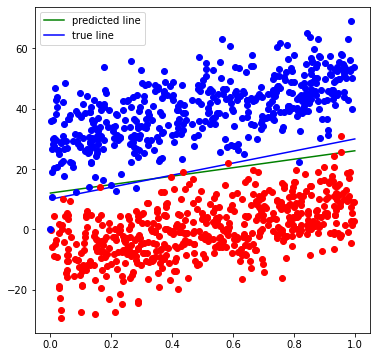

In [0]:
#obtain seperating line

line = np.linspace(0, 1)

# we will use our equation for the line, based on the weights
predictedLine = -((weights[0][0] * line) + weights[1]) / weights[0][1]
trueLine = w * line + b

fig, plt.subplots(figsize=(6,6))
plt.plot(line, predictedLine, color='green', label='predicted line')
plt.plot(line, trueLine, color='blue', label='true line')

for i in range(0, len(data)):
    if ((labels[i] == 0)):
      plt.plot(data[i, 0], data[i, 1], 'bo')
    else:
      plt.plot(data[i, 0], data[i, 1], 'ro')

plt.legend()

##Gradient Descent

Gradient descent is another algorithm within the realm of artificial intelligence. This one is used to minimize functions by iteratively finding the steepest decent using the negative of the gradient. This is used as an optimization algorithm to find the best or fastest path in solving a problem.

This algorithm uses the equation $ w = w \pm \alpha * \frac{\delta L}{\delta w}$ with variable $\alpha$ being the learning rate

The following is a simple implementation of this algorithm, which uses gradient descent to find the minimum of a function

In [0]:
next_x = 6
gamma = 0.01
precision = 0.00001
max_iters = 10000  

# Derivative function
def df(x):
    return 4 * x ** 3 - 9 * x ** 2


for _ in range(max_iters):
    current_x = next_x
    next_x = current_x - gamma * df(current_x)

    step = next_x - current_x
    if abs(step) <= precision:
        break

print("Minimum at ", next_x)

Minimum at  2.2499646074278457


##Optimizers

Optimizers are functions which help in gradient descent and other computing functions during the training process. These functions tie together the loss function and model praramenters to update the model automatically based on the output. Essentially, the optimizers shape and mold a model to the most accurate possible form.

##Learning Rate

Learning rate is an important part of Artificial Intelligence programming, as it deals with the speed and variability of learning a program does. The learning rate is a hyperparameter that controls how much a model will alter in accordance to estimated errors when the weights are updated. Using the right learning rate is vital, because a learning rate too small could halt the learning process, while one too large could lead to an unstable or inaccurate training process.

The weight is updated by its gradient multiplied by the learning rate. $w = w - \alpha * \frac{\delta L}{\delta w}$

#Finetuning a Pretrained Model

Finetuning a model is process by which a new model is produced from an existing, trained model. This new model is then used to train different data sets in different settings. This technique helps avoid working with the entirety of huge amounts of data which would require massive amounts of computing power, and instead allows a much smaller amount of data to be trained, and not from scratch. 

The following is an example loading a pretrained model.

In [0]:
from keras.applications import VGG16
from keras import models
from keras import layers
from keras import optimizers

#Load the VGG model
image_size = 32
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Freeze the layers except the last 4 layers
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)
 
# Create the model
model = models.Sequential()
 
# Add the vgg convolutional base model
model.add(vgg_conv)
 
# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()

<keras.engine.input_layer.InputLayer object at 0x7f57a0b1e470> False
<keras.layers.convolutional.Conv2D object at 0x7f57a0b1e128> False
<keras.layers.convolutional.Conv2D object at 0x7f57a0b1e278> False
<keras.layers.pooling.MaxPooling2D object at 0x7f57a3c9c390> False
<keras.layers.convolutional.Conv2D object at 0x7f579a0c4940> False
<keras.layers.convolutional.Conv2D object at 0x7f579a0c4da0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f57a3e85dd8> False
<keras.layers.convolutional.Conv2D object at 0x7f57a3e858d0> False
<keras.layers.convolutional.Conv2D object at 0x7f579aaae2e8> False
<keras.layers.convolutional.Conv2D object at 0x7f57a3d69b70> False
<keras.layers.pooling.MaxPooling2D object at 0x7f57a3d69be0> False
<keras.layers.convolutional.Conv2D object at 0x7f57a3d72940> False
<keras.layers.convolutional.Conv2D object at 0x7f57a3d72eb8> False
<keras.layers.convolutional.Conv2D object at 0x7f579d051b38> False
<keras.layers.pooling.MaxPooling2D object at 0x7f579eadac88>